<a href="https://colab.research.google.com/github/harikrishnareddymallavarapu/Masters/blob/main/Masters_3_2_LDA_Eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive
Mounted at /content/drive


In [2]:
%%capture
!pip install pyLDAvis==2.1.2
!python -m spacy download en_core_web_md

In [3]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
# import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [4]:
import pickle

pkl_file = open('drive/My Drive/Top-Ex/lda_model_20.pkl', 'rb')
lda_model = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('drive/My Drive/Top-Ex/lda_data_lemmatized.pkl', 'rb')
data_lemmatized = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('drive/My Drive/Top-Ex/lda_id2word.pkl', 'rb')
id2word = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('drive/My Drive/Top-Ex/lda_corpus.pkl', 'rb')
corpus = pickle.load(pkl_file)
pkl_file.close()


In [5]:
import pickle
pkl_file = open('drive/My Drive/Top-Ex/lda_model_list.pkl', 'rb')
lda_model_list = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('drive/My Drive/Top-Ex/lda_coherenceDict.pkl', 'rb')
coherenceDict = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('drive/My Drive/Top-Ex/lda_perplexity.pkl', 'rb')
perplexity_list = pickle.load(pkl_file)
pkl_file.close()

In [6]:
list(coherenceDict.values())

[0.3673734090547553,
 0.39903261149525704,
 0.4208892432924753,
 0.45148262541826845,
 0.46467104919167956,
 0.472997426456689,
 0.4812729513785939,
 0.48085232449042115,
 0.5270162832358296]

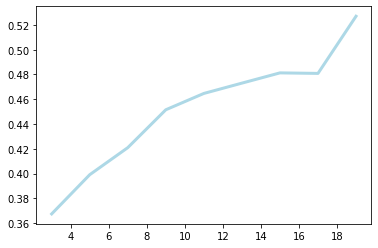

<Figure size 288x576 with 0 Axes>

In [7]:
 import matplotlib.pyplot as plt
x = [3,5,7,9,11,13,15,17,19]
y = list(coherenceDict.values())
fig = plt.figure()
fig2 = plt.figure(figsize=plt.figaspect(2.0))
ax = fig.add_subplot(111)
ax.plot(x,y, color='lightblue', linewidth=3)
plt.show()

In [11]:
lda_model_list

In [19]:
 lda_model = lda_model_list[4] #11 is the topic count considered

In [20]:
import pyLDAvis.gensim 
import pyLDAvis
# import pyLDAvis.gensim
# import pyLDAvis.gensimvis

pyLDAvis.enable_notebook(local=True)
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

# # import pyLDAvis
# # import pyLDAvis.gensim_models
# vis = gensimvis.prepare(topic_model=lda_model, corpus=corpus, dictionary=id2word)
# pyLDAvis.enable_notebook()
# pyLDAvis.display(vis)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.058615  0.016496       1        1  16.661204
9     -0.027596 -0.147289       2        1  13.038218
5     -0.233259  0.007305       3        1  11.629660
2     -0.062348 -0.001562       4        1  10.265085
0      0.077901 -0.092754       5        1  10.064396
6     -0.153990 -0.119560       6        1   7.880741
8      0.127758 -0.111430       7        1   6.668196
1     -0.028933  0.093392       8        1   6.360636
3      0.279307 -0.000145       9        1   6.168726
4      0.010004  0.343075      10        1   6.039531
10     0.069772  0.012472      11        1   5.223608, topic_info=          Term           Freq          Total Category  logprob  loglift
40       trump   76090.000000   76090.000000  Default  30.0000  30.0000
33         say  266835.000000  266835.000000  Default  29.0000  29.0000
1487      vote   24607.000000   24607.000000  Default  28.0000  28.0000
170     police   22307.000000   22307.000000  Default  27.0000  27.0000
3     campaign   30447.000000   30447.000000  Default  26.0000  26.0000
...        ...            ...            ...      ...      ...      ...
227       year    4697.541111   69736.183643  Topic11  -4.8761   0.2543
650     family    3317.705842   22478.585450  Topic11  -5.2239   1.0387
581       risk    2740.283561    8274.228355  Topic11  -5.4151   1.8469
703    program    2828.593952   12627.222910  Topic11  -5.3834   1.4559
226       work    2777.404552   44236.004653  Topic11  -5.4016   0.1840

[781 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1918      2  0.999828  abortion
43        2  0.246120     abuse
43        9  0.702691     abuse
43       11  0.051052     abuse
890       2  0.696497    action
...     ...       ...       ...
227      11  0.067368      year
604       1  0.766803     young
604       6  0.057139     young
604       9  0.067557     young
604      11  0.108359     young

[1860 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 10, 6, 3, 1, 7, 9, 2, 4, 5, 11])

In [14]:
pprint(lda_model.print_topics())

[(0,
  '0.055*"say" + 0.011*"trump" + 0.010*"tell" + 0.009*"official" + '
  '0.007*"government" + 0.007*"report" + 0.006*"call" + 0.006*"statement" + '
  '0.006*"include" + 0.006*"week"'),
 (1,
  '0.022*"case" + 0.019*"law" + 0.015*"court" + 0.011*"legal" + 0.011*"right" '
  '+ 0.010*"charge" + 0.010*"federal" + 0.010*"state" + 0.010*"order" + '
  '0.009*"rule"'),
 (2,
  '0.012*"people" + 0.011*"year" + 0.010*"percent" + 0.010*"plan" + '
  '0.009*"pay" + 0.009*"state" + 0.009*"work" + 0.008*"say" + 0.008*"program" '
  '+ 0.007*"student"'),
 (3,
  '0.026*"company" + 0.024*"say" + 0.017*"year" + 0.015*"percent" + '
  '0.012*"market" + 0.010*"game" + 0.008*"business" + 0.008*"team" + '
  '0.007*"share" + 0.006*"player"'),
 (4,
  '0.009*"new" + 0.008*"show" + 0.007*"video" + 0.007*"film" + 0.007*"story" + '
  '0.006*"include" + 0.006*"character" + 0.005*"movie" + 0.005*"write" + '
  '0.005*"music"'),
 (5,
  '0.008*"water" + 0.008*"food" + 0.008*"say" + 0.006*"human" + 0.006*"year" + '
  '0

[(8,
  '0.033*"team" + 0.033*"game" + 0.021*"play" + 0.019*"season" + 0.017*"win" + 0.016*"player" + 0.011*"second" + 0.011*"year" + 0.011*"week" + 0.010*"final"'),
 (2,
  '0.026*"water" + 0.022*"food" + 0.012*"eat" + 0.009*"patient" + 0.008*"ship" + 0.007*"warm" + 0.007*"scientist" + 0.007*"storm" + 0.006*"climate" + 0.006*"area"'),
 (6,
  '0.023*"law" + 0.022*"state" + 0.015*"student" + 0.014*"federal" + 0.013*"rule" + 0.011*"issue" + 0.011*"public" + 0.010*"case" + 0.010*"court" + 0.009*"policy"'),
 (10,
  '0.041*"say" + 0.037*"police" + 0.024*"attack" + 0.023*"kill" + 0.022*"officer" + 0.013*"people" + 0.013*"vehicle" + 0.013*"shoot" + 0.012*"isis" + 0.009*"gun"'),
 (1,
  '0.064*"company" + 0.019*"apple" + 0.017*"business" + 0.015*"product" + 0.012*"sale" + 0.012*"employee" + 0.012*"customer" + 0.011*"share" + 0.010*"store" + 0.010*"technology"'),
 (3,
  '0.070*"trump" + 0.033*"say" + 0.023*"campaign" + 0.022*"election" + 0.017*"vote" + 0.013*"presidential" + 0.011*"candidate" + 0.

In [ ]:
lda_model(corpu[1])

NameError: ignored